In [1]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [2]:
import re
text = "Hello, world. This is a test"
result = re.split(r'(\s)', text) #Splits the text based on whitespace characters, \s stands for whitespace
print(result)

['Hello,', ' ', 'world.', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test']


In [3]:
result = re.split(r'([,.]|\s)', text)  #[,.] splits apart the commas and periods as well
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test']


In [4]:
result = [item.strip() for item in result if item.strip()] #removing redundant whitespaces
print(result)

'''
Note: encoding whitespace as well can be useful in some applications like llm for coding where indentation matters
'''

['Hello', ',', 'world', '.', 'This', 'is', 'a', 'test']


'\nNote: encoding whitespace as well can be useful in some applications like llm for coding where indentation matters\n'

In [5]:
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.?_!"()\']|--|\s)', text) # A bit more advanced handling of punctuations and hyphens
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [6]:
preprocessed = re.split(r'([,.?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(len(preprocessed)) #Below is the number of tokens in the snippet

4649


In [7]:
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [8]:
'''
Next step will be producing token IDs. For this first we need to build a vocabulary
'''

all_words = sorted(list(set(preprocessed))) #We use a set so only the unique words are stored
vocab_size = len(all_words)
print(vocab_size)

1159


In [9]:
vocab = {token:integer for integer, token in enumerate(all_words)}
for i, item in enumerate(vocab.items()):
  if(i > 50):
    break
  print(item)

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Carlo;', 25)
('Chicago', 26)
('Claude', 27)
('Come', 28)
('Croft', 29)
('Destroyed', 30)
('Devonshire', 31)
('Don', 32)
('Dubarry', 33)
('Emperors', 34)
('Florence', 35)
('For', 36)
('Gallery', 37)
('Gideon', 38)
('Gisburn', 39)
('Gisburns', 40)
('Grafton', 41)
('Greek', 42)
('Grindle', 43)
('Grindle:', 44)
('Grindles', 45)
('HAD', 46)
('Had', 47)
('Hang', 48)
('Has', 49)
('He', 50)


In [40]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab #A
        self.int_to_str = {i:s for s,i in vocab.items()} #B
    def encode(self, text): #C
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
    def decode(self, ids): #D
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text) #E
        return text

In [104]:
tokenizer = SimpleTokenizerV1(vocab)

In [42]:
text = """"It's the last he painted, you know," Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 58, 2, 872, 1013, 615, 541, 763, 5, 1155, 608, 5, 1, 69, 7, 39, 873, 1136, 773, 812, 7]


In [43]:
tokenizer.decode(ids)

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

In [106]:
# Trying the encode on text outside training data
text = "Hello, do you like tea?"
tokenizer.encode(text)

#As we see, we get an error if we run the cell as 'Hello' is absent in the training data

In [45]:
# Handline unseen words
# We add two more tokens in vocab i.e. <unk> for unseen words and <endoftext> for end of sentences

all_words.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_words)}
print(len(vocab.items()))

1161


In [46]:
for i, item in enumerate(list(vocab.items())[-5:]):
  print(item)

('younger', 1156)
('your', 1157)
('yourself', 1158)
('<|endoftext|>', 1159)
('<|unk|>', 1160)


In [47]:
# Modified class

class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab #A
        self.int_to_str = {i:s for s,i in vocab.items()} #B
    def encode(self, text): #C
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        ids = []
        for s in preprocessed:
          if(s not in self.str_to_int.keys()):
            ids.append(self.str_to_int['<|unk|>'])
          else:
            ids.append(self.str_to_int[s])
        return ids
    def decode(self, ids): #D
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text) #E
        return text

In [48]:
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))
print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [49]:
tokenizer = SimpleTokenizerV2(vocab)
print(tokenizer.encode(text))

[1160, 5, 362, 1155, 642, 1000, 10, 1159, 57, 1013, 981, 1009, 738, 1013, 1160, 7]


In [50]:
print(tokenizer.decode(tokenizer.encode(text)))

<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.


In [51]:
'''
Some other special tokens that researchers use

<BOS> - Beginning of sequence
<EOS> - End of Sequence(Just like <endofsentence>)
<PAD> - Padding, when training LLMs with batch size larger than one, its not necessary that all sequences lengths are same so we need to
pad shorter sequence lengths with <PAD> tokens.

GPT Models just use <|endofsentence|> token instead of <EOS> and <PAD>, in future we'll be masking padding tokens while training so what
we use for training becomes irrelevant

Moreover, the tokenizer used for GPT models also doesn't use an <|unk|>
token for out-of-vocabulary words. Instead, GPT models use a byte pair
encoding tokenizer, which breaks down words into subword units

'''

"\nSome other special tokens that researchers use\n\n<BOS> - Beginning of sequence\n<EOS> - End of Sequence(Just like <endofsentence>)\n<PAD> - Padding, when training LLMs with batch size larger than one, its not necessary that all sequences lengths are same so we need to\npad shorter sequence lengths with <PAD> tokens. \n\nGPT Models just use <|endofsentence|> token instead of <EOS> and <PAD>, in future we'll be masking padding tokens while training so what \nwe use for training becomes irrelevant\n\nMoreover, the tokenizer used for GPT models also doesn't use an <|unk|>\ntoken for out-of-vocabulary words. Instead, GPT models use a byte pair\nencoding tokenizer, which breaks down words into subword units\n\n"

In [19]:
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.2 MB/s eta 0:00:00


In [52]:
import importlib
import tiktoken
print("tiktoken version:",
importlib.metadata.version("tiktoken"))

tiktoken version: 0.7.0


In [53]:
tokenizer = tiktoken.get_encoding("gpt2")

In [54]:
text = "Hello, do you like tea? <|endoftext|> In the sunlit terraces of someunknownPlace."
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 286, 617, 34680, 27271, 13]


In [55]:
'''
An interesting Observation, BPE tokenizer is able to reconstruct unknown words as well, it does so by breaking down unknown words into
smaller known tokens or even individual characters so its able to reconstruct it well during decoding without using <|unk|> token
'''

strings = tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of someunknownPlace.


In [56]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [57]:
enc_sample = enc_text[50:]

In [58]:
context_size = 4 #A
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print(f"x: {x}")
print(f"y: {y}")

x: [290, 4920, 2241, 287]
y: [4920, 2241, 287, 257]


In [59]:
for i in range(1, context_size+1):
  context = enc_sample[:i]
  desired = enc_sample[i]
  print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [60]:
for i in range(1, context_size+1):
  context = enc_sample[:i]
  desired = enc_sample[i]
  print(tokenizer.decode(context), "---->", # Converting Token IDs to text
tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


In [61]:
'''
To implement efficient data loaders, we collect the inputs in a tensor, x, where each
row represents one input context. A second tensor, y, contains the corresponding prediction
targets (next words), which are created by shifting the input by one position.
'''

import torch
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
  def __init__(self, txt, tokenizer, max_length, stride):
    self.tokenizer = tokenizer
    self.input_ids = []
    self.target_ids = []

    token_ids = tokenizer.encode(txt)

    for i in range(0, len(token_ids) - max_length, stride):
      input_chunk = token_ids[i:i + max_length]
      target_chunk = token_ids[i + 1: i + max_length + 1]
      self.input_ids.append(torch.tensor(input_chunk))
      self.target_ids.append(torch.tensor(target_chunk))

  def __len__(self):
    return len(self.input_ids)

  def __getitem__(self, idx):
    return self.input_ids[idx], self.target_ids[idx]



In [62]:
def create_dataloader(txt, batch_size=4, max_length=256, stride=128):
  tokenizer = tiktoken.get_encoding("gpt2") #A
  dataset = GPTDatasetV1(txt, tokenizer, max_length, stride) #B
  dataloader = DataLoader(dataset, batch_size=batch_size) #C
  return dataloader

In [63]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
  raw_text = f.read()
dataloader = create_dataloader(raw_text, batch_size=1, max_length=4, stride=1)
data_iter = iter(dataloader) #A
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [64]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [65]:
dataloader = create_dataloader(raw_text, batch_size=8, max_length=4, stride=5) #stride = max lenght + 1 to avoid overlap leading to overfitting
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 3619,   402,   271, 10899],
        [  257,  7026, 15632,   438],
        [  257,   922,  5891,  1576],
        [  568,   340,   373,   645],
        [ 5975,   284,   502,   284],
        [  326,    11,   287,   262],
        [  286,   465, 13476,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [  402,   271, 10899,  2138],
        [ 7026, 15632,   438,  2016],
        [  922,  5891,  1576,   438],
        [  340,   373,   645,  1049],
        [  284,   502,   284,  3285],
        [   11,   287,   262,  6001],
        [  465, 13476,    11,   339]])


### Creating Token Embedding

In [87]:
input_ids = torch.tensor([5, 1, 3, 2])

In [88]:
vocab_size = 6
output_dim = 3

In [89]:
torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [90]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [69]:
'''
If we compare the embedding vector for token ID 3 to the previous
embedding matrix, we see that it is identical to the 4th row (Python starts
with a zero index, so it's the row corresponding to index 3). In other words,
the embedding layer is essentially a look-up operation that retrieves rows
from the embedding layer's weight matrix via a token ID.
'''

"\nIf we compare the embedding vector for token ID 3 to the previous\nembedding matrix, we see that it is identical to the 4th row (Python starts\nwith a zero index, so it's the row corresponding to index 3). In other words,\nthe embedding layer is essentially a look-up operation that retrieves rows\nfrom the embedding layer's weight matrix via a token ID.\n"

## A detour, Embedding vs Linear Layer

In [71]:
'''
Embedding Layer vs Linear layer

Essentially they offer the same functionality but nn.Embedding is computationally efficient
'''

import torch

print("PyTorch version:", torch.__version__)

PyTorch version: 2.3.0+cu121


In [72]:
# Suppose we have the following 3 training examples,
# which may represent token IDs in a LLM context
idx = torch.tensor([2, 3, 1])

# The number of rows in the embedding matrix can be determined
# by obtaining the largest token ID + 1.
# If the highest token ID is 3, then we want 4 rows, for the possible
# token IDs 0, 1, 2, 3
num_idx = max(idx)+1

# The desired embedding dimension is a hyperparameter
out_dim = 5

In [73]:
# We use the random seed for reproducibility since
# weights in the embedding layer are initialized with
# small random values
torch.manual_seed(123)

embedding = torch.nn.Embedding(num_idx, out_dim)

In [74]:
embedding.weight

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.3035, -0.5880,  1.5810],
        [ 1.3010,  1.2753, -0.2010, -0.1606, -0.4015],
        [ 0.6957, -1.8061, -1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096, -0.4076,  0.7953]], requires_grad=True)

In [78]:
embedding(torch.tensor([1])) #Basically the 1st index element in embedding.weight tensor (Lookup Table)

tensor([[ 1.3010,  1.2753, -0.2010, -0.1606, -0.4015]],
       grad_fn=<EmbeddingBackward0>)

In [79]:
embedding(torch.tensor([2]))

tensor([[ 0.6957, -1.8061, -1.1589,  0.3255, -0.6315]],
       grad_fn=<EmbeddingBackward0>)

In [80]:
idx = torch.tensor([2, 3, 1])
embedding(idx)

tensor([[ 0.6957, -1.8061, -1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096, -0.4076,  0.7953],
        [ 1.3010,  1.2753, -0.2010, -0.1606, -0.4015]],
       grad_fn=<EmbeddingBackward0>)

### Using nn.Linear

In [81]:
onehot = torch.nn.functional.one_hot(idx)
onehot

tensor([[0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0]])

In [82]:
torch.manual_seed(123)
linear = torch.nn.Linear(num_idx, out_dim, bias=False)
linear.weight

Parameter containing:
tensor([[-0.2039,  0.0166, -0.2483,  0.1886],
        [-0.4260,  0.3665, -0.3634, -0.3975],
        [-0.3159,  0.2264, -0.1847,  0.1871],
        [-0.4244, -0.3034, -0.1836, -0.0983],
        [-0.3814,  0.3274, -0.1179,  0.1605]], requires_grad=True)

In [83]:
linear.weight = torch.nn.Parameter(embedding.weight.T.detach())
linear.weight

Parameter containing:
tensor([[ 0.3374,  1.3010,  0.6957, -2.8400],
        [-0.1778,  1.2753, -1.8061, -0.7849],
        [-0.3035, -0.2010, -1.1589, -1.4096],
        [-0.5880, -0.1606,  0.3255, -0.4076],
        [ 1.5810, -0.4015, -0.6315,  0.7953]], requires_grad=True)

In [84]:
linear(onehot.float())

tensor([[ 0.6957, -1.8061, -1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096, -0.4076,  0.7953],
        [ 1.3010,  1.2753, -0.2010, -0.1606, -0.4015]], grad_fn=<MmBackward0>)

In [85]:
embedding(idx)

tensor([[ 0.6957, -1.8061, -1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096, -0.4076,  0.7953],
        [ 1.3010,  1.2753, -0.2010, -0.1606, -0.4015]],
       grad_fn=<EmbeddingBackward0>)

In [ ]:
'''
Since all but one index in each one-hot encoded row are 0 (by design), this matrix multiplication is essentially the same as a look-up of the one-hot elements
This use of the matrix multiplication on one-hot encodings is equivalent to the embedding layer look-up but can be inefficient if we work with large embedding matrices, because there are a lot of wasteful multiplications by zero
'''

## End of Detour

In [91]:
print(embedding_layer(input_ids))

tensor([[-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010],
        [-0.4015,  0.9666, -1.1481],
        [ 1.2753, -0.2010, -0.1606]], grad_fn=<EmbeddingBackward0>)


## Encoding word positions

In [ ]:
'''
The self attention mechanism in LLMs doesn't have a notion of position or order for the tokens within a sequence.

In principle, the deterministic, position-independent embedding of the token
ID is good for reproducibility purposes. However, since the self-attention
mechanism of LLMs itself is also position-agnostic, it is helpful to inject
additional position information into the LLM.

To achieve this, there are two broad categories of position-aware
embeddings: a)relative positional embeddings and b)absolute positional embeddings.

Absolute positional embeddings are directly associated with specific
positions in a sequence. For each position in the input sequence, a unique
embedding is added to the token's embedding to convey its exact location.
For instance, the first token will have a specific positional embedding, the second token another distinct embedding, and so on

Instead of focusing on the absolute position of a token, the emphasis of
relative positional embeddings is on the relative position or distance
between tokens. This means the model learns the relationships in terms of
"how far apart" rather than "at which exact position." The advantage here is
that the model can generalize better to sequences of varying lengths, even if
it hasn't seen such lengths during training.
'''

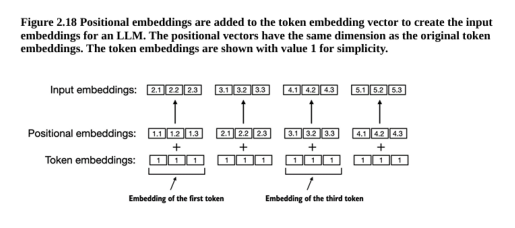

In [93]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/tokenization 1.png')
plt.imshow(img)
plt.axis('off')  # Hide axes for a cleaner display
plt.show()

## Creating Embedding

In [94]:
output_dim = 256
vocab_size = 50257
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [95]:
max_length = 4
dataloader = create_dataloader(raw_text, batch_size=8, max_length=max_length, stride=5)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 3619,   402,   271, 10899],
        [  257,  7026, 15632,   438],
        [  257,   922,  5891,  1576],
        [  568,   340,   373,   645],
        [ 5975,   284,   502,   284],
        [  326,    11,   287,   262],
        [  286,   465, 13476,    11]])

Inputs shape:
 torch.Size([8, 4])


In [96]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [100]:
'''
Another embedding layer for absolute positional Encoding
'''

block_size = max_length
pos_embedding_layer = torch.nn.Embedding(block_size, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(block_size)) # (torch.arange(block_size)) this gives 0, 1, 2, 3 as output.
print(pos_embeddings.shape)

torch.Size([4, 256])


In [ ]:
'''
 As shown in the preceding code example, the input to the pos_embeddings
 is usually a placeholder vector torch.arange(block_size), which contains
 a sequence of numbers 1, 2, ..., up to the maximum input length. The
 block_size is a variable that represents the supported input size of the
 LLM. Here, we choose it similar to the maximum length of the input text.
 In practice, input text can be longer than the supported block size, in which
 case we have to truncate the text. The text can also be shorter than the block
 size, in which case we fill in the remaining input with placeholder tokens to
 match the block size, as we will see in chapter 3
'''

In [101]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


In [ ]:
'''
 The input_embeddings we created, as summarized in figure 2.19, are the
 embedded input examples that can now be processed by the main LLM
 modules, which we will begin implementing in chapter 3
'''

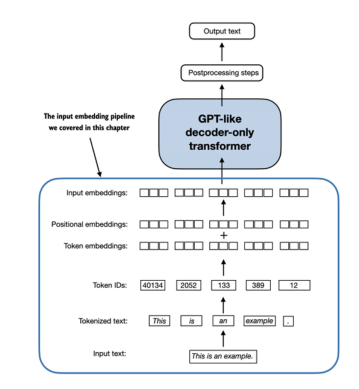

In [102]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/tokenization 2.png')
plt.imshow(img)
plt.axis('off')  # Hide axes for a cleaner display
plt.show()

In [ ]:
                  ########################################################################################################
                  ##########                                 End of Chapter 2                                   ##########
                  ########################################################################################################